In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***1. Провести чтение данных, изучить набор данных. ***

In [19]:
df = pd.read_csv('yieldinrf.csv')
df

,Unnamed: 0,1976- 1980,1981 - 1985,1986- 1990,1991- 1995,1996- 2000,2001,2002,2003,2004,2005,2006
0,Зерновые культуры (в весе \nпосле доработки),"13,8","13,0","16,5","15,7","15,1","19,4","19,6","17,8","18,8","18,5","18,9"
1,пшеница озимая,"21,6","20,1","28,5","24,3","21,3","29,1","29,9","21,2","29,4","28,3","28,0"
2,пшеница яровая,"12,2","11,0","12,3","11,7","12,7","15,7","14,4","14,8","13,8","13,0","14,3"
3,рожь озимая,"11,1","13,0","16,7","15,9","15,0","18,8","19,0","18,6","15,5","15,7","17,1"
4,кукуруза на зерно,"27,8","29,0","29,8","27,6","22,4","18,0","28,5","32,0","40,3","38,5","36,2"
5,ячмень озимый,"28,4","27,9","37,3","32,3","30,4","36,3","39,4","26,3","37,4","32,4","36,3"
6,ячмень яровой,"13,9","12,2","15,6","15,7","14,7","19,0","18,3","19,1","16,8","17,3","18,0"
7,овес,"12,2","12,3","13,8","13,6","13,6","17,1","15,6","16,8","15,1","14,4","14,7"
8,просо,"6,3","8,1","12,9","8,1","9,0","7,9","8,5","13,9","11,9","11,2","10,4"
9,гречиха,"4,0","4,1","6,2","5,2","6,0","5,4","5,4","8,2","7,5","7,3","8,1"


In [3]:
df.columns

Index(['Unnamed: 0', '1976- \n1980', '1981 - 1985', '1986- \n1990',
       '1991- \n1995', '1996-\n2000', '2001', '2002', '2003', '2004', '2005',
       '2006'],
      dtype='object')

In [21]:
df.duplicated().sum()

0

In [4]:
df.columns = ['type', '1976-1980', '1981-1985', '1986-1990',
       '1991-1995', '1996-2000', '2001', '2002', '2003', '2004', '2005',
       '2006']

In [5]:
for col in df.columns:
    for i in range(len(df)):
        df.loc[i, col] = df.loc[i, col].replace(',', '.')

In [6]:
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

***2. Провести описательную статистику данных. ***

In [7]:
df.shape

(24, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
type         24 non-null object
1976-1980    24 non-null float64
1981-1985    24 non-null float64
1986-1990    24 non-null float64
1991-1995    24 non-null float64
1996-2000    24 non-null float64
2001         24 non-null float64
2002         24 non-null float64
2003         24 non-null float64
2004         24 non-null float64
2005         24 non-null float64
2006         24 non-null float64
dtypes: float64(11), object(1)
memory usage: 2.3+ KB


In [9]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 500)

In [10]:
df.describe()

,1976-1980,1981-1985,1986-1990,1991-1995,1996-2000,2001,2002,2003,2004,2005,2006
count,24.000000,24.000000,24.000000,24.0000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,40.629167,43.462500,53.395833,45.4000,43.416667,45.833333,46.570833,50.112500,53.416667,54.816667,57.875000
std,54.358660,60.057681,75.641445,62.9469,61.357454,62.371305,62.760230,70.523677,76.577245,79.133155,86.856044
min,2.500000,2.900000,3.200000,3.8000,4.000000,5.000000,4.700000,6.600000,5.800000,6.300000,6.100000
25%,9.525000,9.550000,12.200000,10.3500,8.875000,9.050000,11.225000,12.925000,11.475000,11.850000,11.350000
50%,13.850000,13.000000,16.600000,15.7000,14.550000,17.950000,17.100000,17.300000,15.950000,16.400000,16.700000
75%,29.925000,30.175000,35.875000,29.9750,28.750000,35.250000,38.125000,31.625000,38.350000,39.375000,38.200000
max,162.000000,183.000000,247.000000,219.0000,214.000000,209.000000,219.000000,228.000000,277.000000,282.000000,325.000000


In [11]:
df.isna().sum()

type         0
1976-1980    0
1981-1985    0
1986-1990    0
1991-1995    0
1996-2000    0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
dtype: int64

In [12]:
df

,type,1976-1980,1981-1985,1986-1990,1991-1995,1996-2000,2001,2002,2003,2004,2005,2006
0,Зерновые культуры (в весе \nпосле доработки),13.8,13.0,16.5,15.7,15.1,19.4,19.6,17.8,18.8,18.5,18.9
1,пшеница озимая,21.6,20.1,28.5,24.3,21.3,29.1,29.9,21.2,29.4,28.3,28.0
2,пшеница яровая,12.2,11.0,12.3,11.7,12.7,15.7,14.4,14.8,13.8,13.0,14.3
3,рожь озимая,11.1,13.0,16.7,15.9,15.0,18.8,19.0,18.6,15.5,15.7,17.1
4,кукуруза на зерно,27.8,29.0,29.8,27.6,22.4,18.0,28.5,32.0,40.3,38.5,36.2
5,ячмень озимый,28.4,27.9,37.3,32.3,30.4,36.3,39.4,26.3,37.4,32.4,36.3
6,ячмень яровой,13.9,12.2,15.6,15.7,14.7,19.0,18.3,19.1,16.8,17.3,18.0
7,овес,12.2,12.3,13.8,13.6,13.6,17.1,15.6,16.8,15.1,14.4,14.7
8,просо,6.3,8.1,12.9,8.1,9.0,7.9,8.5,13.9,11.9,11.2,10.4
9,гречиха,4.0,4.1,6.2,5.2,6.0,5.4,5.4,8.2,7.5,7.3,8.1


***3. Вычислить коэффициенты корреляции для каждых факторов. ***

In [13]:
df.corr()

,1976-1980,1981-1985,1986-1990,1991-1995,1996-2000,2001,2002,2003,2004,2005,2006
1976-1980,1.000000,0.997746,0.987088,0.989628,0.987319,0.982029,0.977040,0.987915,0.974262,0.977635,0.961826
1981-1985,0.997746,1.000000,0.990525,0.990153,0.986556,0.976441,0.969700,0.985327,0.968397,0.972104,0.953543
1986-1990,0.987088,0.990525,1.000000,0.993784,0.990329,0.981388,0.978769,0.991093,0.982475,0.984350,0.971614
1991-1995,0.989628,0.990153,0.993784,1.000000,0.998808,0.990507,0.982338,0.993564,0.978084,0.980562,0.968229
1996-2000,0.987319,0.986556,0.990329,0.998808,1.000000,0.994866,0.986817,0.995396,0.980431,0.982769,0.972452
2001,0.982029,0.976441,0.981388,0.990507,0.994866,1.000000,0.996222,0.995107,0.987744,0.989118,0.984198
2002,0.977040,0.969700,0.978769,0.982338,0.986817,0.996222,1.000000,0.994022,0.996020,0.996171,0.994364
2003,0.987915,0.985327,0.991093,0.993564,0.995396,0.995107,0.994022,1.000000,0.992986,0.994691,0.987221
2004,0.974262,0.968397,0.982475,0.978084,0.980431,0.987744,0.996020,0.992986,1.000000,0.999648,0.997979
2005,0.977635,0.972104,0.984350,0.980562,0.982769,0.989118,0.996171,0.994691,0.999648,1.000000,0.997371


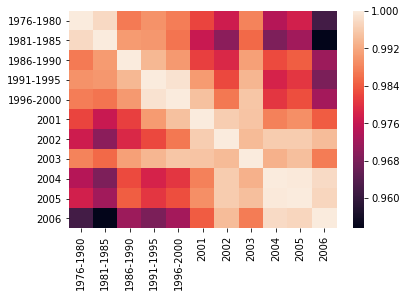

In [17]:
sns.heatmap(df.corr());

***4. Построить матрицу рассеяния. ***

In [14]:
import seaborn as sns

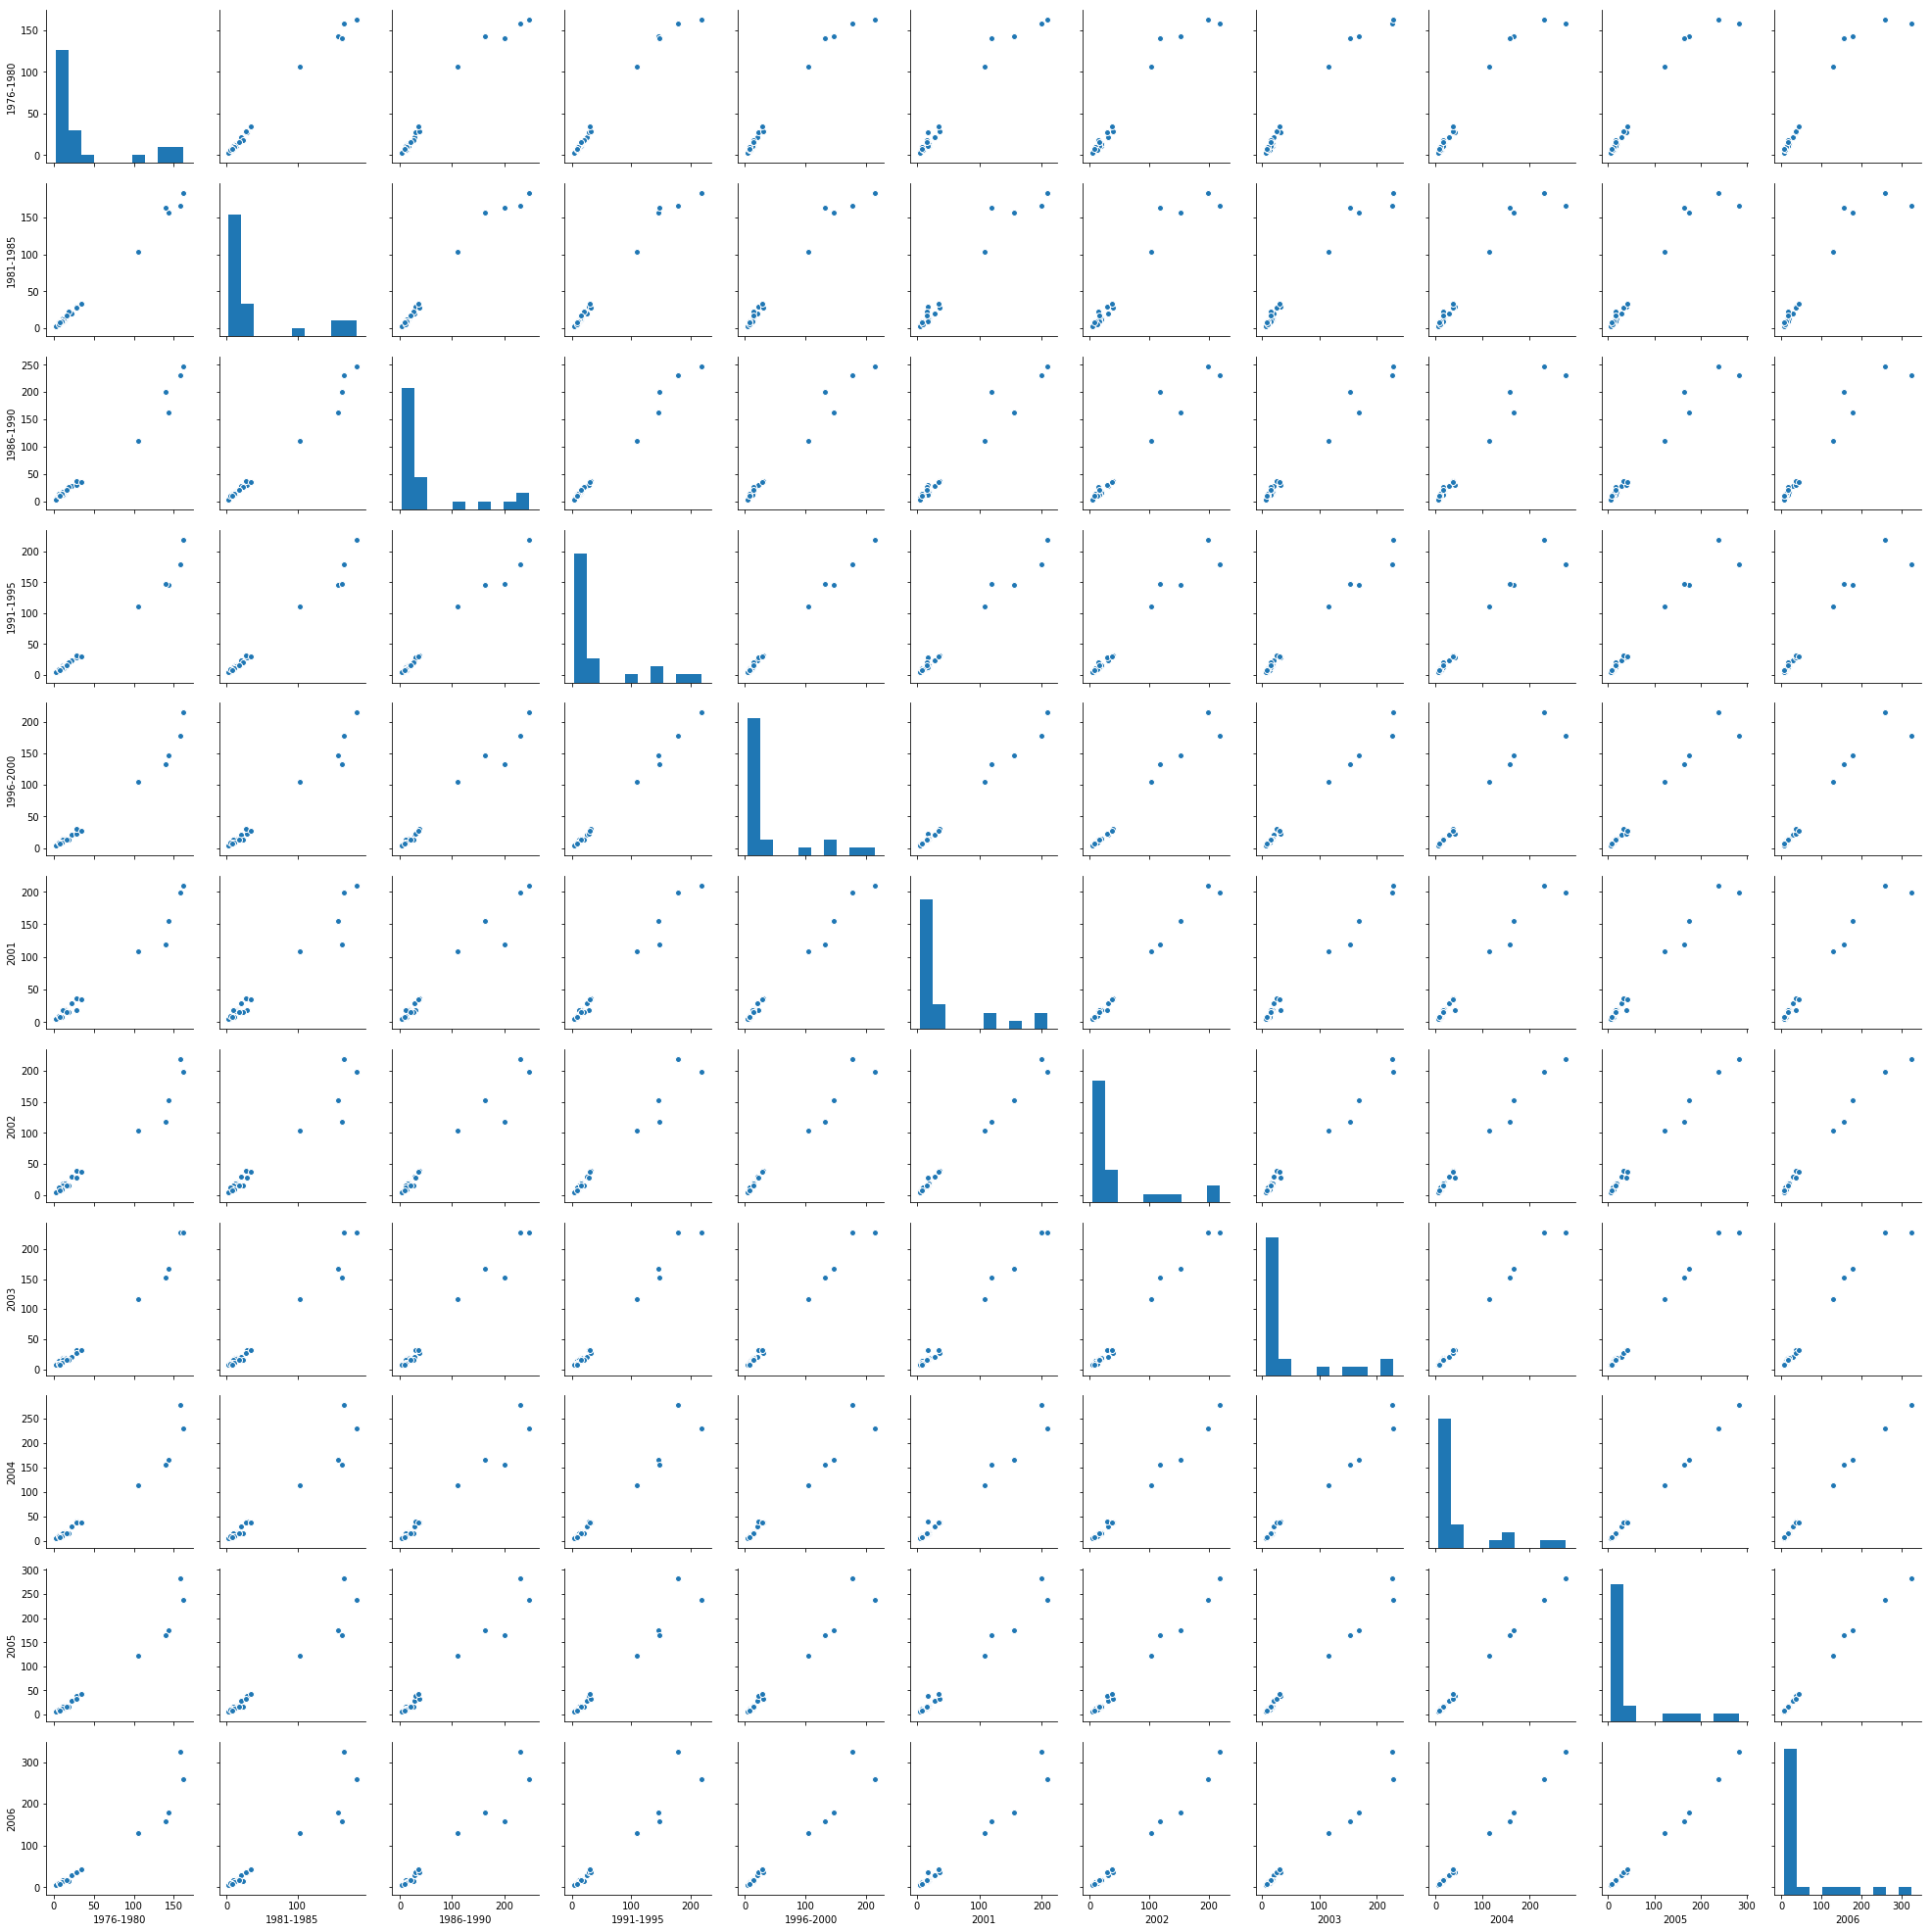

In [15]:
sns.pairplot(df)